# Week 3: Social Media & Graph Analytics

**Web and Social Network Analytics**

---

## Learning Objectives

By the end of this lab, you will be able to:

1. **Build and visualize** graphs using NetworkX
2. **Calculate centrality measures** (degree, betweenness, PageRank, HITS)
3. **Compute clustering coefficients** and understand triadic closure
4. **Understand network properties** like power law distributions and small-world phenomenon
5. **Detect communities** using graph partitioning algorithms

## Setup

Run this cell first to import all required libraries.

In [1]:
# Graph analysis
import networkx as nx
from networkx.algorithms import bipartite

# Visualization
import matplotlib.pyplot as plt

# Data handling
import pandas as pd
import pprint as pp

print('All libraries imported successfully!')

All libraries imported successfully!


---

# Part 1: Introduction to Graphs

---

## 1.1 What is a Graph?

A **graph** is a mathematical structure used to model relationships between objects.

| Term | Definition | Example |
|------|------------|--------|
| **Node (Vertex)** | An entity in the network | A person, website, city |
| **Edge (Link)** | A connection between nodes | Friendship, hyperlink, road |
| **Directed** | Edges have direction | Twitter follows, hyperlinks |
| **Undirected** | Edges have no direction | Facebook friendships |
| **Weighted** | Edges have values | Distance, frequency |

**Real-world examples:**
- Social networks: People connected by friendships
- Web graphs: Pages connected by hyperlinks  
- Transportation: Cities connected by roads

## 1.2 Creating Your First Graph

Let's create a simple undirected graph representing business trips between UK cities.

In [2]:
# Initialize an undirected graph
G = nx.Graph()

# Add edges with weights (number of business trips)
G.add_edge('London', 'Birmingham', weight=5)
G.add_edge('London', 'Brighton', weight=1)
G.add_edge('London', 'Bristol', weight=1)
G.add_edge('London', 'York', weight=2)
G.add_edge('York', 'Edinburgh', weight=3)
G.add_edge('Edinburgh', 'Glasgow', weight=2)

print(f"Nodes: {G.number_of_nodes()}")
print(f"Edges: {G.number_of_edges()}")

Nodes: 7
Edges: 6


## 1.3 Graph Properties

We can explore various properties of nodes and edges.

In [3]:
# List all nodes and edges
print("Nodes:", list(G.nodes()))
print("Edges:", list(G.edges()))

Nodes: ['London', 'Birmingham', 'Brighton', 'Bristol', 'York', 'Edinburgh', 'Glasgow']
Edges: [('London', 'Birmingham'), ('London', 'Brighton'), ('London', 'Bristol'), ('London', 'York'), ('York', 'Edinburgh'), ('Edinburgh', 'Glasgow')]


In [4]:
# Examine properties of each node
for node in G.nodes():
    print(f"\nNode: {node}")
    print(f"  Degree: {G.degree(node)}")
    print(f"  Neighbors: {list(G.neighbors(node))}")


Node: London
  Degree: 4
  Neighbors: ['Birmingham', 'Brighton', 'Bristol', 'York']

Node: Birmingham
  Degree: 1
  Neighbors: ['London']

Node: Brighton
  Degree: 1
  Neighbors: ['London']

Node: Bristol
  Degree: 1
  Neighbors: ['London']

Node: York
  Degree: 2
  Neighbors: ['London', 'Edinburgh']

Node: Edinburgh
  Degree: 2
  Neighbors: ['York', 'Glasgow']

Node: Glasgow
  Degree: 1
  Neighbors: ['Edinburgh']


In [5]:
# Find neighbors of a specific node
node_of_interest = "London"

for neighbor in G.neighbors(node_of_interest):
    print(f"{node_of_interest} is connected to {neighbor}")

London is connected to Birmingham
London is connected to Brighton
London is connected to Bristol
London is connected to York


## 1.4 Visualizing Graphs

NetworkX provides several layout algorithms. The `spring_layout` (Fruchterman-Reingold) is most common.

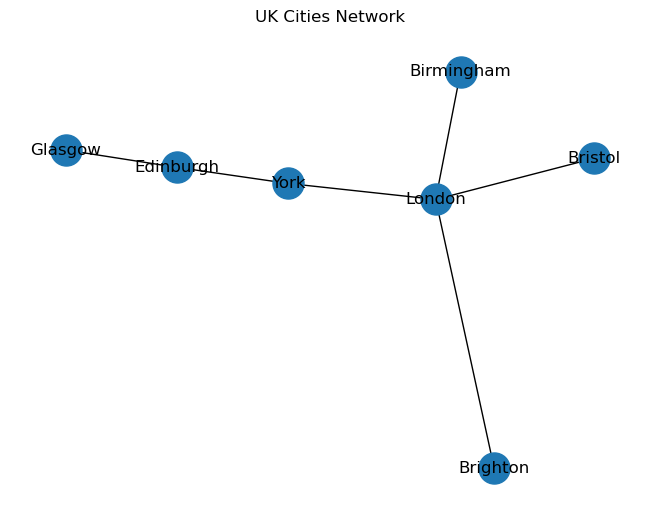

In [7]:
# Basic graph visualization
pos = nx.spring_layout(G, seed=2027)  # seed for reproducibility

nx.draw(G, pos, with_labels=True, node_size=500)
plt.title("UK Cities Network")
plt.show()

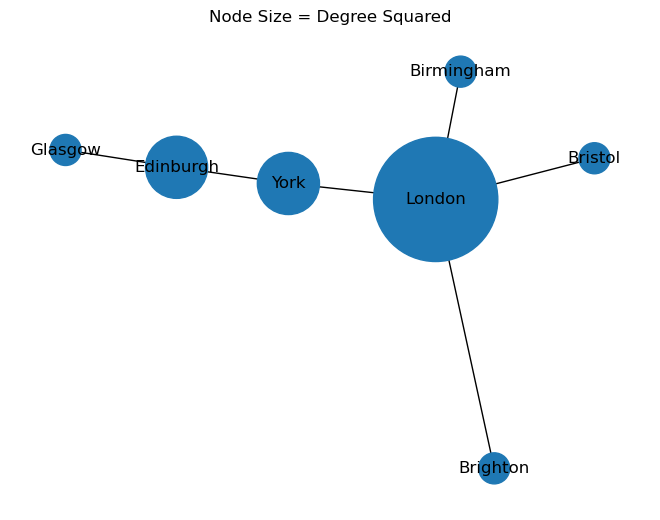

In [8]:
# Scale node size by degree
sizes = [G.degree(node) ** 2 * 500 for node in G.nodes()]

nx.draw(G, pos, with_labels=True, node_size=sizes)
plt.title("Node Size = Degree Squared")
plt.show()

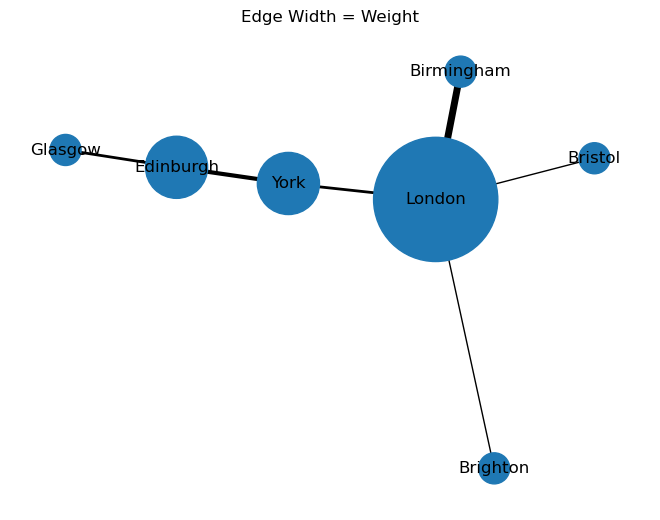

In [9]:
# Scale edge width by weight
widths = [G[u][v].get('weight', 1) for u, v in G.edges()]

nx.draw(G, pos, with_labels=True, node_size=sizes, width=widths)
plt.title("Edge Width = Weight")
plt.show()

## 1.5 Directed Graphs

In directed graphs, edges have direction (from source to target).

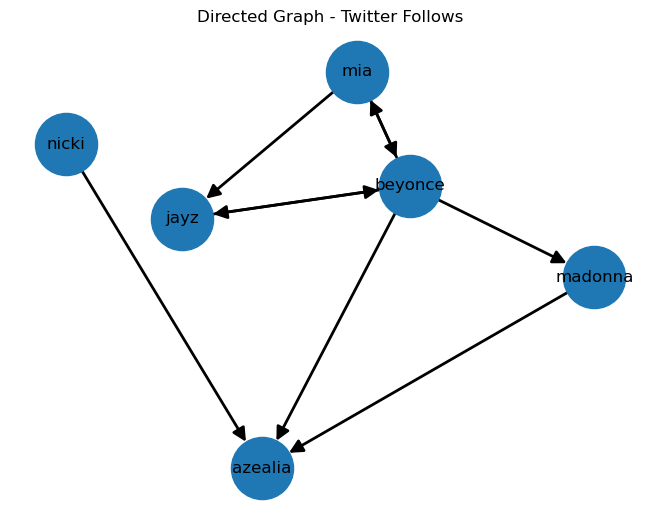

In [10]:
# Create a directed graph (e.g., Twitter follows)
DG = nx.DiGraph()

# Add directed edges (A follows B)
DG.add_edge('beyonce', 'mia', weight=5)
DG.add_edge('beyonce', 'azealia', weight=1)
DG.add_edge('beyonce', 'jayz', weight=1)
DG.add_edge('beyonce', 'madonna', weight=2)
DG.add_edge('madonna', 'azealia', weight=1)
DG.add_edge('nicki', 'azealia', weight=1)

# Mutual follows
DG.add_edge('mia', 'beyonce', weight=5)
DG.add_edge('jayz', 'beyonce', weight=1)
DG.add_edge('mia', 'jayz', weight=2)

pos = nx.spring_layout(DG, seed=42)
nx.draw(DG, pos, with_labels=True, node_size=2000, width=2, 
        arrows=True, arrowsize=20)
plt.title("Directed Graph - Twitter Follows")
plt.show()

In [11]:
# In-degree vs Out-degree
for node in DG.nodes():
    print(f"{node}: in-degree={DG.in_degree(node)}, out-degree={DG.out_degree(node)}")

beyonce: in-degree=2, out-degree=4
mia: in-degree=1, out-degree=2
azealia: in-degree=3, out-degree=0
jayz: in-degree=2, out-degree=1
madonna: in-degree=1, out-degree=1
nicki: in-degree=0, out-degree=1


---

# Part 2: Loading and Saving Graphs

---

## 2.1 Edge List Format

Format: `Source Target {attributes}`

In [12]:
# Save graph to edge list
nx.write_edgelist(G, 'data/graph_city_edgelist.csv')
print("Graph saved to edge list format")

Graph saved to edge list format


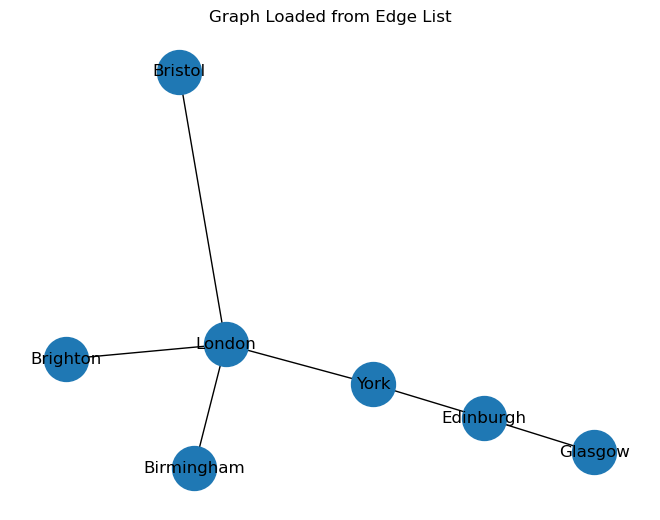

In [13]:
# Load graph from edge list
G_loaded = nx.read_edgelist('data/graph_city_edgelist.csv')

nx.draw(G_loaded, with_labels=True, node_size=1000)
plt.title("Graph Loaded from Edge List")
plt.show()

## 2.2 Adjacency List Format

Format: `source target1 target2 target3 ...`

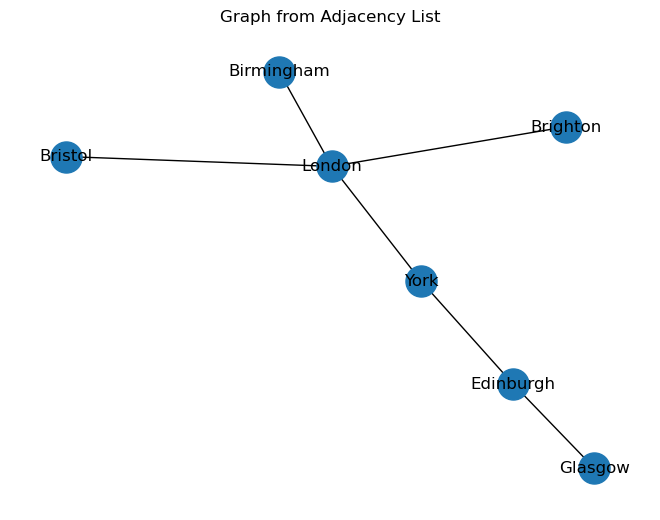

In [14]:
# Save to adjacency list
nx.write_adjlist(G, 'data/graph_city_adjacency.csv')

# Load from adjacency list
G_adj = nx.read_adjlist('data/graph_city_adjacency.csv')

nx.draw(G_adj, with_labels=True, node_size=500)
plt.title("Graph from Adjacency List")
plt.show()

## 2.3 Working with CSV Files

Often we build graphs from CSV data with adjacency matrix format.

In [15]:
# Load adjacency matrix from CSV
df = pd.read_csv('data/graph_simple.csv', index_col=0)
print(df)

         Natalie  Jill  Kasia  Boo  Dill  Xi  Rash
Natalie        0     1      0    4     1   0     1
Jill           1     0      0    1     0   5     0
Kasia          1     0      3    0     1   1     0
Boo            4     1      0    0     0   0     1
Dill           0     0      0    0     0   0     3
Xi             0     5      0    0     0   0     0
Rash           1     0      0    1     3   0     0


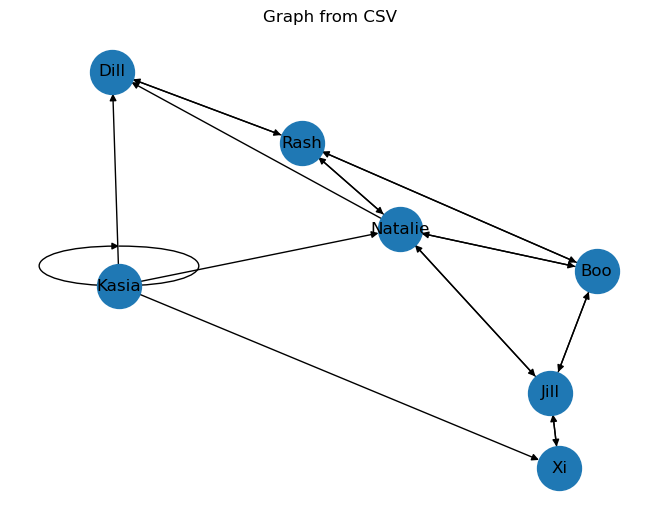

In [16]:
# Build graph from dataframe
DG_csv = nx.DiGraph()

for row, row_values in df.iterrows():
    for column, value in enumerate(row_values):
        if value > 0:
            DG_csv.add_edge(row, df.columns[column], weight=value)

pos = nx.spring_layout(DG_csv, seed=2026)
nx.draw(DG_csv, pos, with_labels=True, node_size=1000)
plt.title("Graph from CSV")
plt.show()

---

# Part 3: Bipartite Graphs

---

## 3.1 What are Bipartite Graphs?

A **bipartite graph** has two distinct sets of nodes, where edges only connect nodes from different sets.

**Examples:**
- Users and products (who bought what)
- Students and courses (who enrolled where)
- Authors and papers (who wrote what)

## 3.2 Creating Bipartite Graphs

In [17]:
# Create a bipartite graph: Users and Social Media Platforms
B = nx.Graph()

# Add nodes with bipartite attribute
B.add_nodes_from(["jill", "nicky", "tessa", "aga", "ecka", "min", "paola"], bipartite=0)
B.add_nodes_from(["netflix", "facebook", "instagram"], bipartite=1)

# Add edges (who uses which platform)
B.add_edge('jill', 'netflix')
B.add_edge('jill', 'facebook')
B.add_edge('jill', 'instagram')
B.add_edge('nicky', 'facebook')
B.add_edge('nicky', 'instagram')
B.add_edge('tessa', 'instagram')
B.add_edge('aga', 'instagram')
B.add_edge('aga', 'netflix')
B.add_edge('ecka', 'instagram')
B.add_edge('ecka', 'facebook')
B.add_edge('min', 'instagram')
B.add_edge('paola', 'instagram')

print(f"Edges: {list(B.edges())}")

Edges: [('jill', 'netflix'), ('jill', 'facebook'), ('jill', 'instagram'), ('nicky', 'facebook'), ('nicky', 'instagram'), ('tessa', 'instagram'), ('aga', 'instagram'), ('aga', 'netflix'), ('ecka', 'instagram'), ('ecka', 'facebook'), ('min', 'instagram'), ('paola', 'instagram')]


## 3.3 Custom Styling for Bipartite Graphs

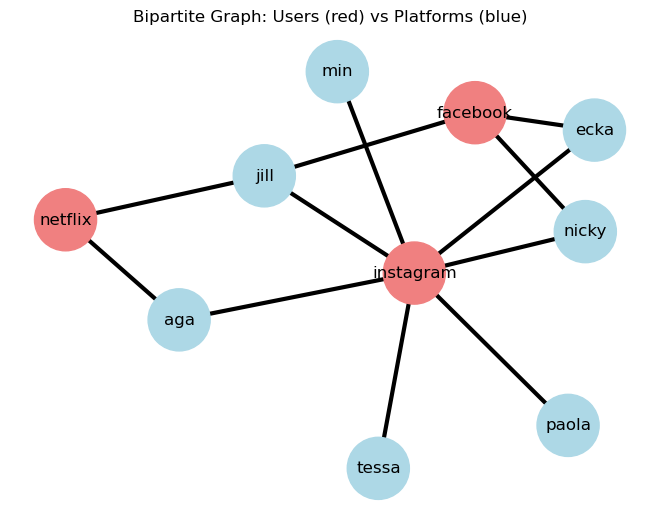

In [18]:
# Color nodes by bipartite group
def get_node_colors(graph):
    """Return colors based on bipartite attribute."""
    colors_dict = bipartite.color(graph)
    return ['lightblue' if colors_dict[node] == 1 else 'lightcoral' 
            for node in graph.nodes()]

pos = nx.spring_layout(B, seed=42)
nx.draw(B, pos, with_labels=True, node_size=2000, width=3, 
        node_color=get_node_colors(B))
plt.title("Bipartite Graph: Users (red) vs Platforms (blue)")
plt.show()

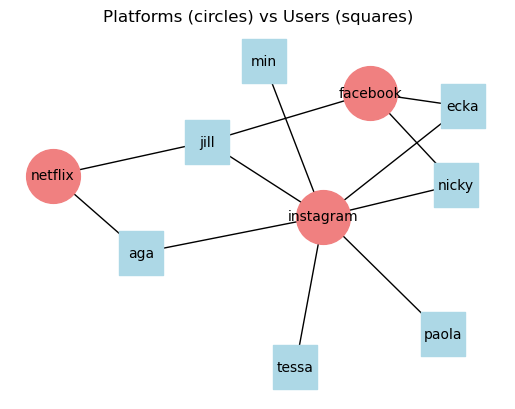

In [19]:
# More detailed styling with different shapes
users = [node for node in B.nodes() if bipartite.color(B)[node] == 1]
platforms = [node for node in B.nodes() if bipartite.color(B)[node] != 1]

nodePos = nx.spring_layout(B, seed=42)

# Draw platforms as circles
nx.draw_networkx_nodes(B, nodePos, nodelist=platforms, 
                       node_size=1500, node_color='lightcoral', node_shape='o')

# Draw users as squares
nx.draw_networkx_nodes(B, nodePos, nodelist=users, 
                       node_size=1000, node_color='lightblue', node_shape='s')

nx.draw_networkx_labels(B, pos=nodePos, font_size=10)
nx.draw_networkx_edges(B, nodePos)

plt.axis('off')
plt.title("Platforms (circles) vs Users (squares)")
plt.show()

---

# Part 4: Centrality Measures

---

Centrality measures help us identify the most "important" nodes in a network. Different measures capture different aspects of importance.

| Measure | Question Answered | Formula |
|---------|-------------------|--------|
| Degree | Who has the most connections? | $C_D(i) = \frac{k_i}{|V|-1}$ |
| Betweenness | Who controls information flow? | $C_B(v) = \sum_{s \neq v \neq t} \frac{\sigma_{st}(v)}{\sigma_{st}}$ |
| PageRank | Who is linked by important pages? | Iterative algorithm |
| HITS | Who are hubs vs authorities? | Mutual reinforcement |

In [20]:
# Use the CSV graph for centrality analysis
pos = nx.spring_layout(DG_csv, seed=2026)

## 4.1 Degree Centrality

**Degree centrality** measures importance by the number of direct connections.

$$C_D(i) = \frac{k_i}{|V|-1}$$

where $k_i$ is the degree of node $i$ and $|V|$ is the total number of nodes.

{'Boo': 1.0,
 'Dill': 0.6666666666666666,
 'Jill': 1.0,
 'Kasia': 0.8333333333333333,
 'Natalie': 1.3333333333333333,
 'Rash': 1.0,
 'Xi': 0.5}


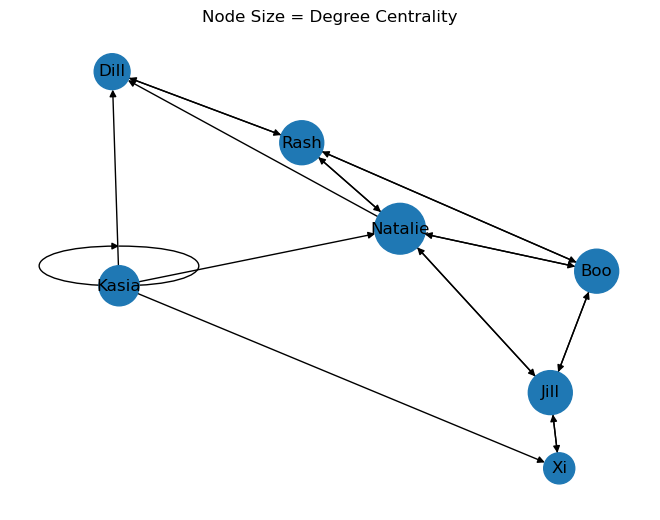

In [21]:
# Calculate degree centrality
degree = nx.degree_centrality(DG_csv)
pp.pprint(degree)

# Visualize with node size proportional to degree
sizes = [value * 1000 for value in degree.values()]

nx.draw(DG_csv, pos, with_labels=True, node_size=sizes)
plt.title("Node Size = Degree Centrality")
plt.show()

## 4.2 Betweenness Centrality

**Betweenness centrality** measures how often a node lies on the shortest path between other nodes.

$$C_B(v) = \sum_{s \neq v \neq t} \frac{\sigma_{st}(v)}{\sigma_{st}}$$

where $\sigma_{st}$ is the number of shortest paths from $s$ to $t$, and $\sigma_{st}(v)$ is the number that pass through $v$.

**High betweenness = Bridge/Gatekeeper** - controls information flow between groups.

{'Boo': 0.1,
 'Dill': 0.016666666666666666,
 'Jill': 0.26666666666666666,
 'Kasia': 0.0,
 'Natalie': 0.25,
 'Rash': 0.15,
 'Xi': 0.016666666666666666}


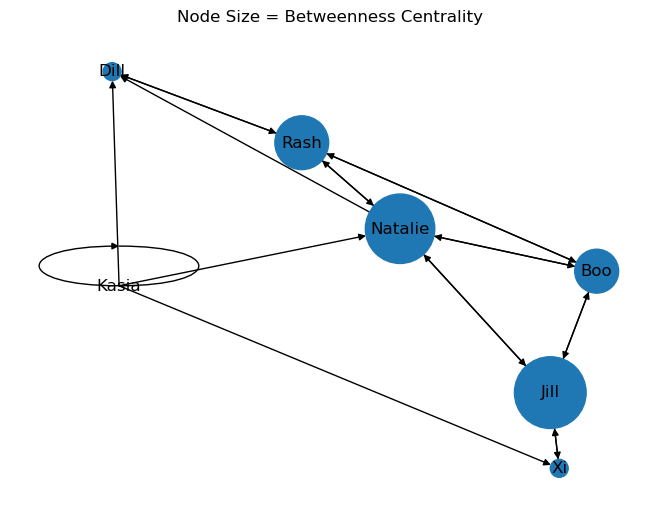

In [22]:
# Calculate betweenness centrality
betweenness = nx.betweenness_centrality(DG_csv)
pp.pprint(betweenness)

# Visualize
sizes = [value * 10000 for value in betweenness.values()]

nx.draw(DG_csv, pos, with_labels=True, node_size=sizes)
plt.title("Node Size = Betweenness Centrality")
plt.show()

## 4.3 PageRank (Review from Week 2)

**PageRank** measures importance based on incoming links from important pages.

{'Boo': 0.15599210915914818,
 'Dill': 0.1407225357442748,
 'Jill': 0.17902523621708966,
 'Kasia': 0.03726708074566054,
 'Natalie': 0.16804525420434355,
 'Rash': 0.18354743372640792,
 'Xi': 0.13540035020307542}


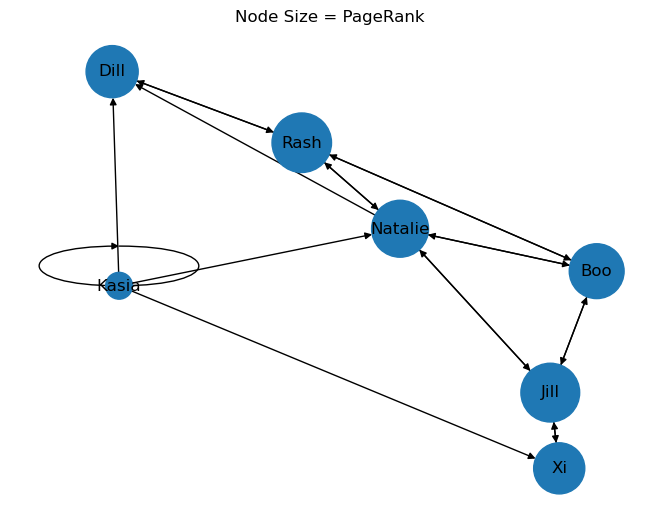

In [23]:
# Calculate PageRank
pagerank = nx.pagerank(DG_csv)
pp.pprint(pagerank)

# Visualize
sizes = [value * 10000 for value in pagerank.values()]

nx.draw(DG_csv, pos, with_labels=True, node_size=sizes)
plt.title("Node Size = PageRank")
plt.show()

## 4.4 Comparing Centrality Measures

Different centrality measures can give different rankings!

In [25]:
# Create comparison table
comparison_data = []
for node in DG_csv.nodes():
    comparison_data.append({
        'Node': node,
        'Degree': round(degree[node], 3),
        'Betweenness': round(betweenness[node], 3),
        'PageRank': round(pagerank[node], 3)
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

   Node  Degree  Betweenness  PageRank
Natalie   1.333        0.250     0.168
   Jill   1.000        0.267     0.179
    Boo   1.000        0.100     0.156
   Dill   0.667        0.017     0.141
   Rash   1.000        0.150     0.184
     Xi   0.500        0.017     0.135
  Kasia   0.833        0.000     0.037


---

# Part 5: Clustering Coefficient

---

## 5.1 Local Clustering Coefficient

The **clustering coefficient** measures how connected a node's neighbors are to each other.

$$C_i = \frac{\text{Number of edges between neighbors}}{\text{Maximum possible edges between neighbors}}$$

For undirected graphs: $C_i = \frac{2 \cdot e_i}{k_i(k_i-1)}$

where $e_i$ is the number of edges between neighbors of node $i$, and $k_i$ is the degree.

**High clustering = Friends know each other (tight-knit group)**

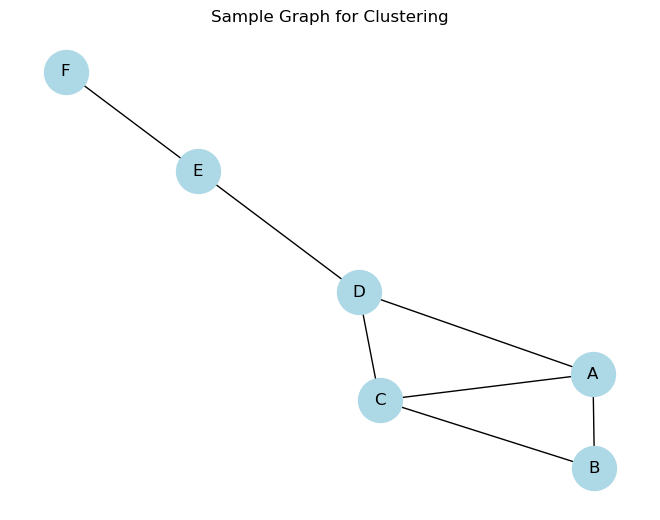

In [26]:
# Create a sample graph for clustering analysis
G_cluster = nx.Graph()
G_cluster.add_edges_from([
    ('A', 'B'), ('A', 'C'), ('A', 'D'),
    ('B', 'C'),  # Triangle: A-B-C
    ('C', 'D'),
    ('D', 'E'), ('E', 'F')
])

pos = nx.spring_layout(G_cluster, seed=42)
nx.draw(G_cluster, pos, with_labels=True, node_size=1000, node_color='lightblue')
plt.title("Sample Graph for Clustering")
plt.show()

In [27]:
# Calculate clustering coefficient for each node
clustering = nx.clustering(G_cluster)

for node, coeff in clustering.items():
    neighbors = list(G_cluster.neighbors(node))
    degree = len(neighbors)
    print(f"Node {node}: clustering={coeff:.3f}, degree={degree}, neighbors={neighbors}")

Node A: clustering=0.667, degree=3, neighbors=['B', 'C', 'D']
Node B: clustering=1.000, degree=2, neighbors=['A', 'C']
Node C: clustering=0.667, degree=3, neighbors=['A', 'B', 'D']
Node D: clustering=0.333, degree=3, neighbors=['A', 'C', 'E']
Node E: clustering=0.000, degree=2, neighbors=['D', 'F']
Node F: clustering=0.000, degree=1, neighbors=['E']


## 5.2 Average Clustering Coefficient

In [28]:
# Average clustering coefficient for the whole network
avg_clustering = nx.average_clustering(G_cluster)
print(f"Average Clustering Coefficient: {avg_clustering:.3f}")

Average Clustering Coefficient: 0.444


## 5.3 Worked Example: Hand Calculation

Let's verify the clustering coefficient for **node A** by hand:

1. **Neighbors of A**: B, C, D (degree = 3)
2. **Maximum possible edges between neighbors**: $\frac{3 \times 2}{2} = 3$
3. **Actual edges between neighbors**: B-C, C-D = 2
4. **Clustering coefficient**: $C_A = \frac{2}{3} = 0.667$

In [29]:
# Verify with NetworkX
print(f"Clustering coefficient of A: {nx.clustering(G_cluster, 'A'):.3f}")
print(f"Expected: 0.667")

Clustering coefficient of A: 0.667
Expected: 0.667


## 5.4 Connection to Triadic Closure

High clustering coefficient indicates **triadic closure** - the tendency for friends of friends to become friends.

---

# Part 6: Network Properties

---

## 6.1 Power Law Distribution

Many real networks follow a **power law** degree distribution:

$$P(k) \propto k^{-\alpha}$$

This means a few nodes have many connections ("hubs") while most have few.

**"Rich get richer" effect**: Popular nodes attract more connections (preferential attachment).

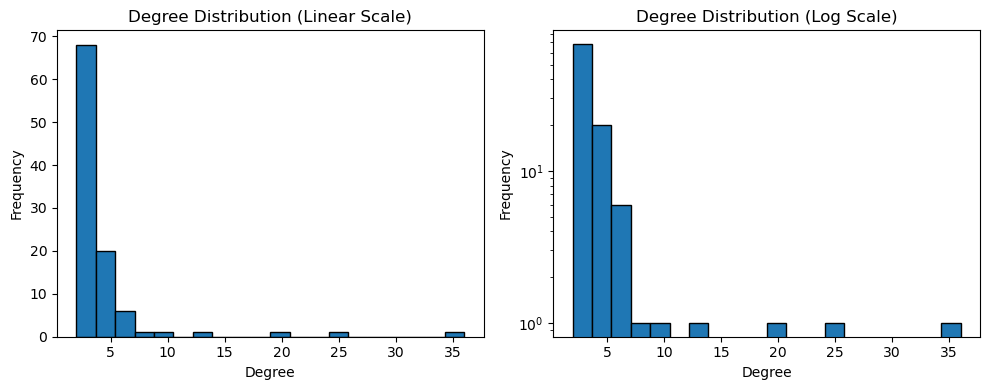

In [30]:
# Generate a scale-free network (Barabasi-Albert model)
G_sf = nx.barabasi_albert_graph(100, 2, seed=42)

# Plot degree distribution
degrees = [G_sf.degree(n) for n in G_sf.nodes()]

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(degrees, bins=20, edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution (Linear Scale)')

plt.subplot(1, 2, 2)
plt.hist(degrees, bins=20, edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Degree Distribution (Log Scale)')

plt.tight_layout()
plt.show()

## 6.2 Small World Networks

**Small world phenomenon**: Most nodes can be reached from any other in a small number of steps.

- **Six degrees of separation**: Any two people are connected by ~6 intermediaries
- Facebook: Average path length is ~4 hops

Average path length: 2.22
Average clustering: 0.22


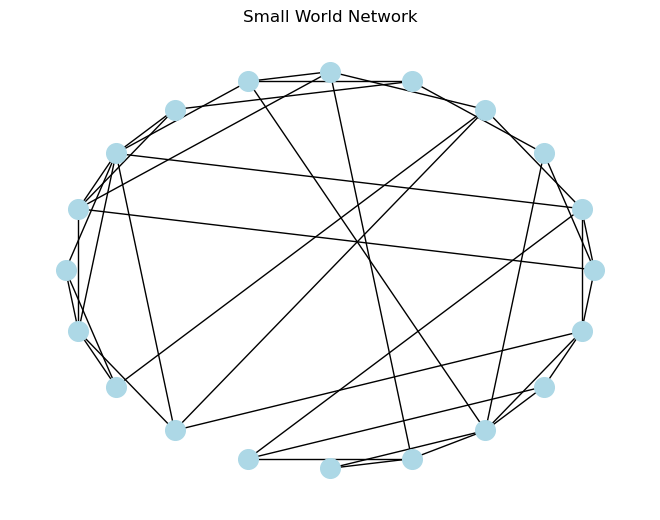

In [31]:
# Generate a small-world network (Watts-Strogatz model)
G_sw = nx.watts_strogatz_graph(20, 4, 0.3, seed=42)

# Calculate average path length
if nx.is_connected(G_sw):
    avg_path = nx.average_shortest_path_length(G_sw)
    print(f"Average path length: {avg_path:.2f}")
    print(f"Average clustering: {nx.average_clustering(G_sw):.2f}")

pos = nx.circular_layout(G_sw)
nx.draw(G_sw, pos, node_size=200, node_color='lightblue')
plt.title("Small World Network")
plt.show()

## 6.3 Connected Components

In [32]:
# Check if graph is connected
print(f"Is connected: {nx.is_connected(G_sw)}")

# For directed graphs, use weakly/strongly connected
print(f"Number of connected components: {nx.number_connected_components(G_sw)}")

Is connected: True
Number of connected components: 1


---

# Part 7: Community Detection

---

## 7.1 What is Community Detection?

**Goal**: Find groups of nodes that are:
- **Densely connected** within the group
- **Sparsely connected** between groups

Like identifying friend groups in a social network.

## 7.2 Graph Cuts and Normalized Cut

The **cut size** is the number of edges between two partitions.

**Normalized Cut (Ncut)** balances cut size with partition sizes:

$$Ncut(S) = \frac{\sum_{i \in S, j \in \bar{S}} A(i,j)}{\sum_{i \in S} k_i} + \frac{\sum_{i \in S, j \in \bar{S}} A(i,j)}{\sum_{j \in \bar{S}} k_j}$$

In [33]:
# Create a bipartite social network for community detection
B_social = nx.Graph()

list1 = ["jill", "nicky", "tessa", "aga", "ecka", "min"]
list2 = ["james", "peter", "john", "bill", "steven", "luna"]

B_social.add_nodes_from(list1, bipartite=0)
B_social.add_nodes_from(list2, bipartite=1)

# Add edges
B_social.add_edge('jill', 'peter')
B_social.add_edge('jill', 'luna')
B_social.add_edge('jill', 'steven')
B_social.add_edge('nicky', 'james')
B_social.add_edge('nicky', 'peter')
B_social.add_edge('tessa', 'john')
B_social.add_edge('aga', 'bill')
B_social.add_edge('aga', 'luna')
B_social.add_edge('ecka', 'steven')
B_social.add_edge('ecka', 'john')
B_social.add_edge('min', 'peter')
B_social.add_edge('min', 'james')

# Calculate cut size
cut = nx.cut_size(B_social, list1, list2)
print(f"Cut size between original partitions: {cut}")

Cut size between original partitions: 12


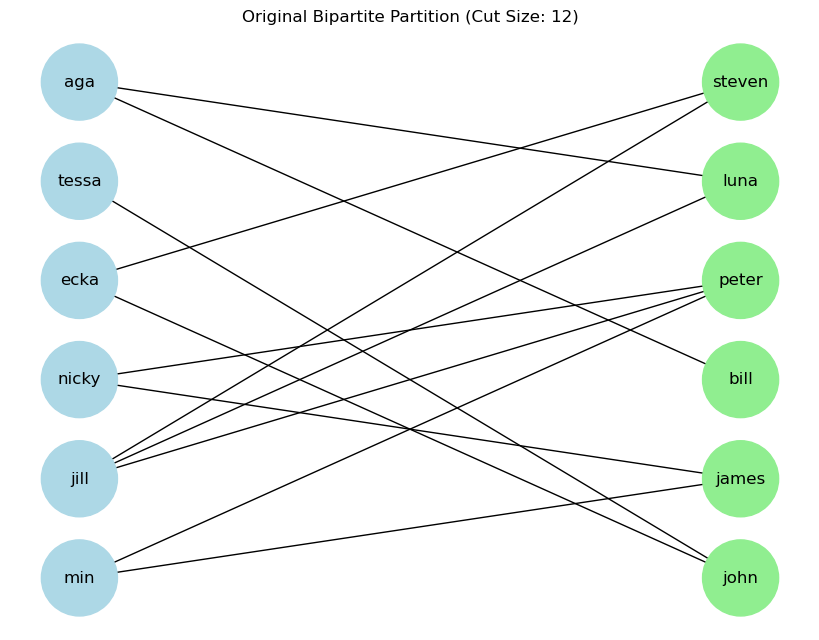

In [34]:
# Visualize original partition
left_set, right_set = bipartite.sets(B_social)

pos = {}
pos.update((node, (1, index)) for index, node in enumerate(left_set))
pos.update((node, (2, index)) for index, node in enumerate(right_set))

color_map = ['lightblue' if node in list1 else 'lightgreen' for node in B_social]

plt.figure(figsize=(8, 6))
nx.draw(B_social, pos, with_labels=True, node_color=color_map, node_size=3000)
plt.title(f"Original Bipartite Partition (Cut Size: {cut})")
plt.show()

## 7.3 Manual Swap Optimization

A greedy approach: Try swapping nodes between partitions to reduce cut size.

In [35]:
def draw_partitioned_graph(graph, partition, position, title):
    """Draw graph with partition coloring."""
    color_map = ['lightblue' if node in partition[0] else 'lightgreen' 
                 for node in graph]
    plt.figure(figsize=(8, 6))
    nx.draw(graph, position, with_labels=True, node_color=color_map, node_size=3000)
    plt.title(title)
    plt.show()

def swap_cut_plot(B, pos, list1, list2):
    """Iteratively swap nodes to minimize cut size."""
    # Make copies to avoid modifying originals
    l1 = list1.copy()
    l2 = list2.copy()
    
    ncut0 = nx.cut_size(B, l1, l2)
    title = f'Original Cut: {ncut0}'
    draw_partitioned_graph(B, [l1, l2], pos, title)
    
    # Try all possible swaps
    for i in range(len(l1)):
        for j in range(len(l2)):
            # Swap nodes
            l1[i], l2[j] = l2[j], l1[i]
            
            ncut = nx.cut_size(B, l1, l2)
            
            if ncut < ncut0:
                ncut0 = ncut
                title = f"Cut after swap: {ncut}"
                draw_partitioned_graph(B, [l1, l2], pos, title)
            else:
                # Swap back if no improvement
                l1[i], l2[j] = l2[j], l1[i]

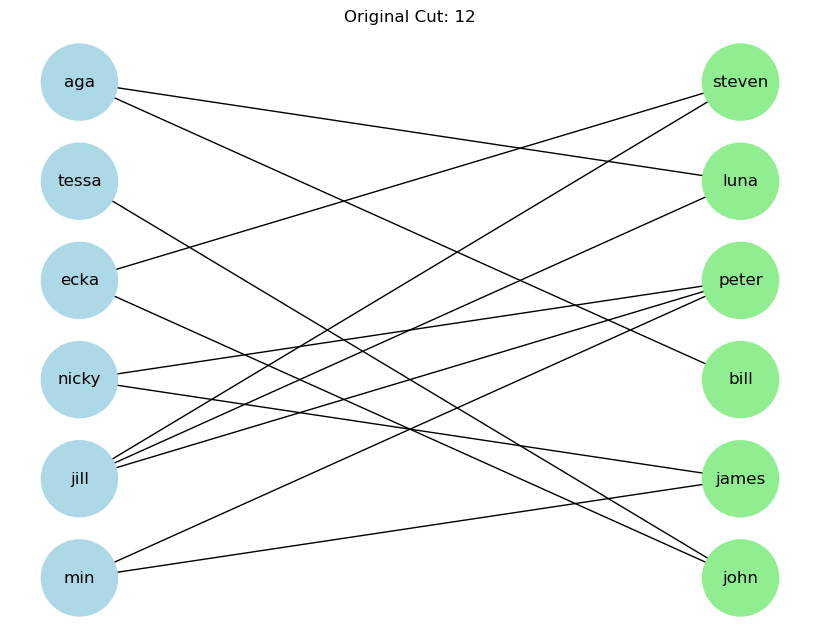

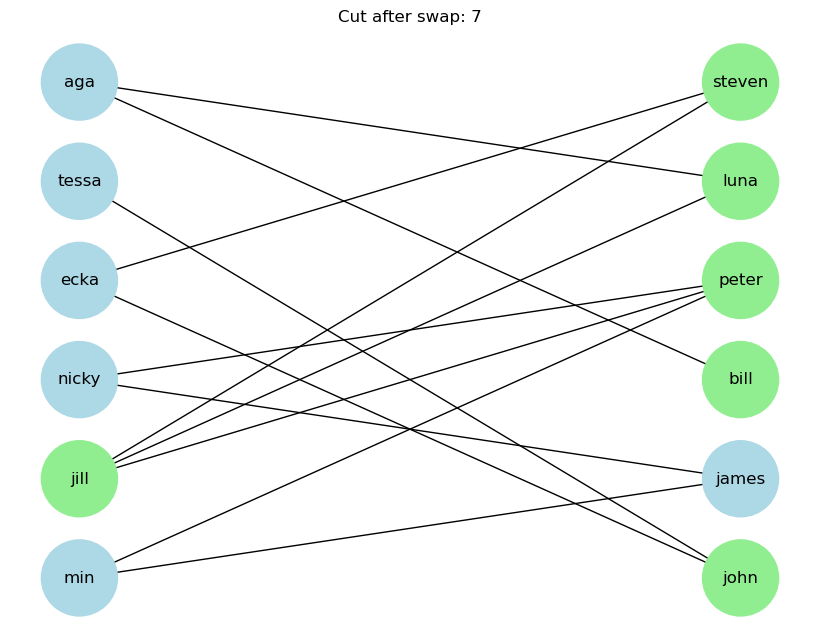

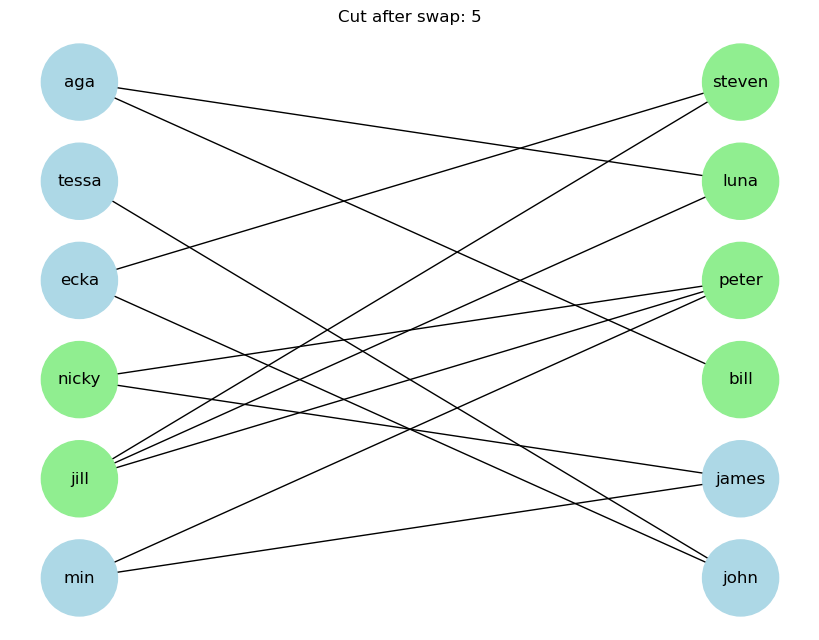

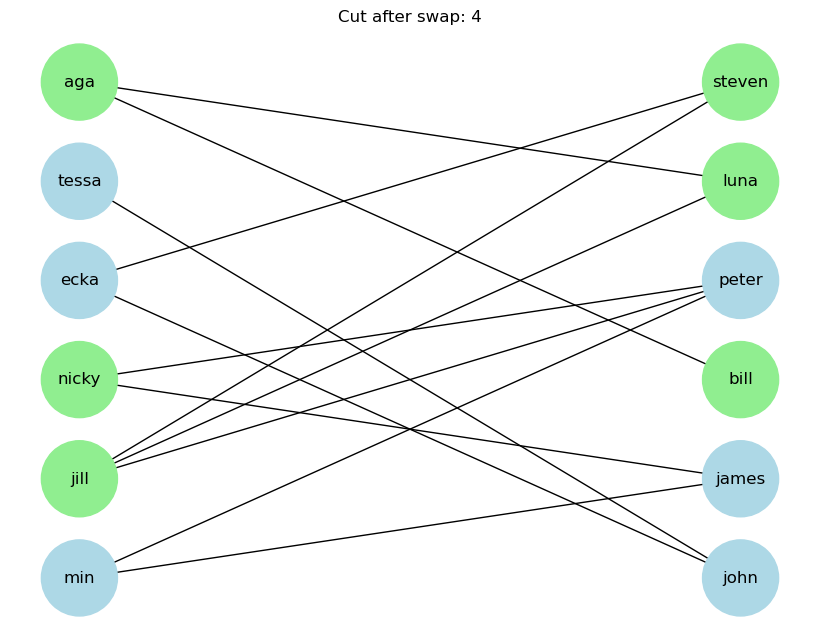

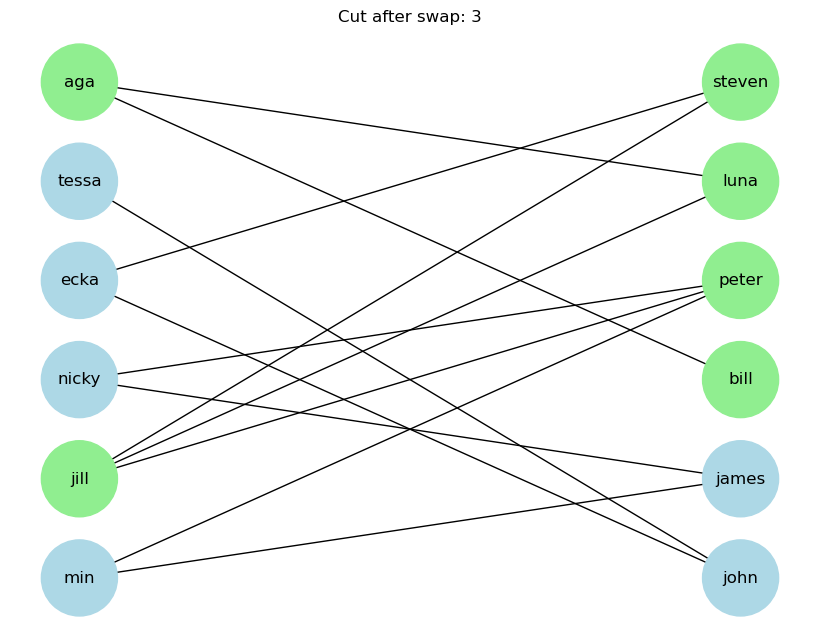

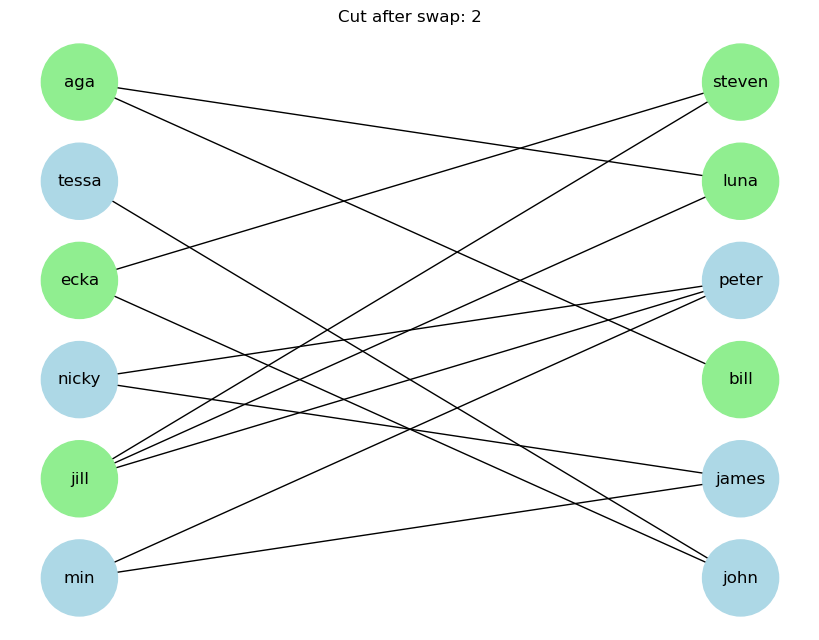

In [36]:
# Run manual swap optimization
swap_cut_plot(B_social, pos, list1.copy(), list2.copy())

## 7.4 Kernighan-Lin Algorithm

The **Kernighan-Lin algorithm** is a more sophisticated heuristic for graph bisection.

In [37]:
# Apply Kernighan-Lin bisection
partition = nx.algorithms.community.kernighan_lin.kernighan_lin_bisection(B_social)

partition1, partition2 = partition
print(f"Partition 1: {partition1}")
print(f"Partition 2: {partition2}")

# Calculate new cut size
kl_cut = nx.cut_size(B_social, partition1, partition2)
print(f"\nKernighan-Lin cut size: {kl_cut}")

Partition 1: {'john', 'bill', 'ecka', 'steven', 'tessa', 'aga'}
Partition 2: {'james', 'min', 'jill', 'nicky', 'peter', 'luna'}

Kernighan-Lin cut size: 2


## 7.5 Visualizing Partitions

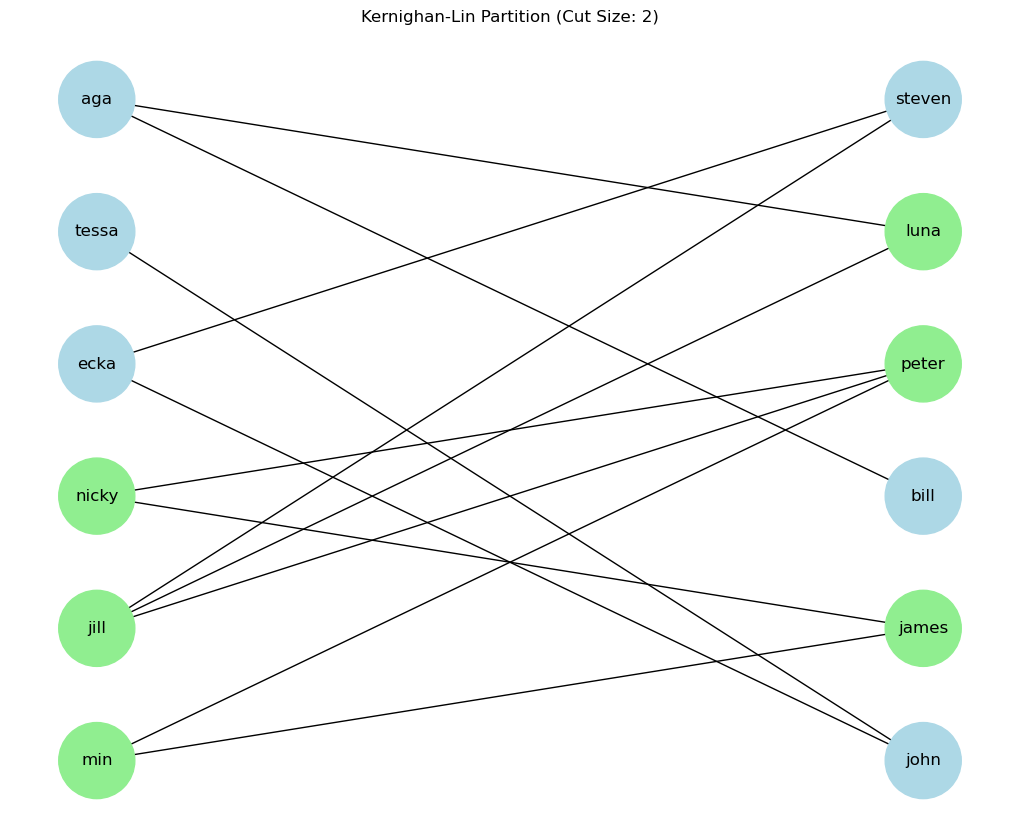

In [38]:
# Visualize Kernighan-Lin partition
color_map_kl = ['lightblue' if node in partition1 else 'lightgreen' 
                for node in B_social]

plt.figure(figsize=(10, 8))
nx.draw(B_social, pos, with_labels=True, node_color=color_map_kl, node_size=3000)
plt.title(f"Kernighan-Lin Partition (Cut Size: {kl_cut})")
plt.show()

**Note**: The Kernighan-Lin algorithm often finds better partitions than greedy swapping because it considers multiple swaps together.

---

# Part 8: Triadic Closure and Ties

---

## 8.1 Triadic Closure

**Triadic closure** is the principle that if A is connected to B, and A is connected to C, then B and C are likely to become connected.

**"Friends of friends become friends"**

Causes:
- **Opportunity**: Meet through common friends
- **Trust**: Mutual friends provide trust
- **Incentive**: Avoid awkwardness in group settings

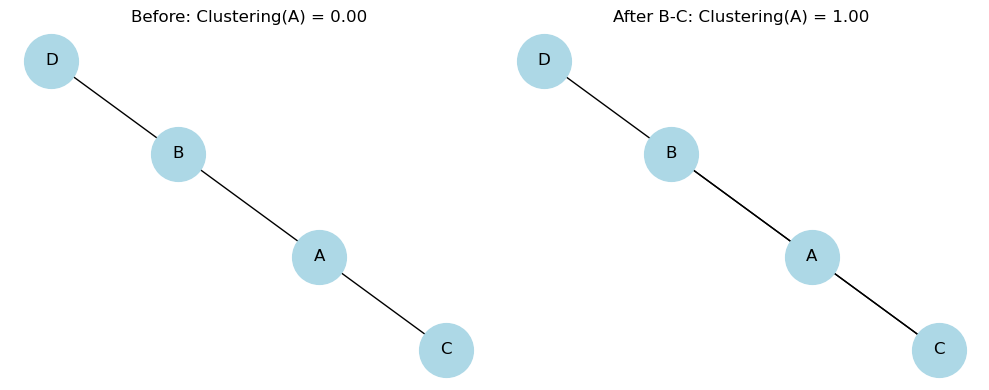

In [39]:
# Demonstrate triadic closure
G_triad = nx.Graph()
G_triad.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D')])

pos = nx.spring_layout(G_triad, seed=42)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
nx.draw(G_triad, pos, with_labels=True, node_size=1500, node_color='lightblue')
plt.title(f"Before: Clustering(A) = {nx.clustering(G_triad, 'A'):.2f}")

# Add triadic closure edge
G_triad.add_edge('B', 'C')

plt.subplot(1, 2, 2)
nx.draw(G_triad, pos, with_labels=True, node_size=1500, node_color='lightblue')
plt.title(f"After B-C: Clustering(A) = {nx.clustering(G_triad, 'A'):.2f}")

plt.tight_layout()
plt.show()

## 8.2 Strong vs Weak Ties

| Strong Ties | Weak Ties |
|-------------|----------|
| Close friends, family | Acquaintances |
| Frequent contact | Infrequent contact |
| Emotional support | Access to NEW information |
| Same information bubble | Bridge to other communities |

**Strength of Weak Ties**: Acquaintances often provide more valuable job leads because they have access to different networks!

## 8.3 Local Bridges

A **local bridge** is an edge whose endpoints have no common neighbors.

**Key insight**: If a node satisfies the Strong Triadic Closure Property and has at least two strong ties, then any local bridge it's involved in must be a weak tie.

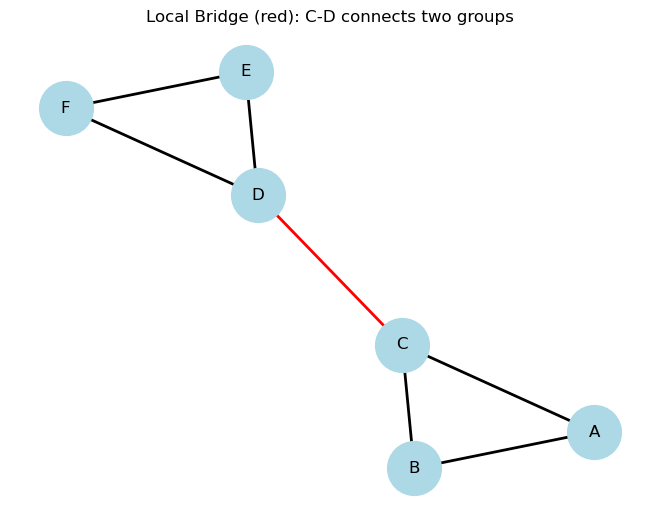

In [40]:
# Example of local bridge
G_bridge = nx.Graph()
G_bridge.add_edges_from([
    ('A', 'B'), ('A', 'C'), ('B', 'C'),  # Group 1
    ('D', 'E'), ('D', 'F'), ('E', 'F'),  # Group 2
    ('C', 'D')  # Local bridge!
])

pos = nx.spring_layout(G_bridge, seed=42)

# Highlight the bridge
edge_colors = ['red' if edge == ('C', 'D') or edge == ('D', 'C') 
               else 'black' for edge in G_bridge.edges()]

nx.draw(G_bridge, pos, with_labels=True, node_size=1500, 
        node_color='lightblue', edge_color=edge_colors, width=2)
plt.title("Local Bridge (red): C-D connects two groups")
plt.show()

## 8.4 Strong Triadic Closure Property

A node **violates** the Strong Triadic Closure Property if it has strong ties to two non-linked nodes.

In other words: If A has strong ties to both B and C, then B and C must be connected.

---

# Summary

---

## Key Takeaways

1. **Graphs** model relationships: nodes are entities, edges are connections

2. **Centrality measures** identify important nodes:
   - Degree: Most connections
   - Betweenness: Bridge between groups
   - PageRank: Linked by important nodes
   - HITS: Hubs vs Authorities

3. **Clustering coefficient** measures local density (friends knowing friends)

4. **Network properties**:
   - Power law: Few hubs, many low-degree nodes
   - Small world: Short paths between any two nodes

5. **Community detection** finds groups in networks

6. **Triadic closure** and **weak ties** explain network evolution

---

## When to Use Each Centrality Measure

| Question | Use |
|----------|-----|
| Who has the most friends? | Degree Centrality |
| Who controls information flow? | Betweenness Centrality |
| Who is most respected/cited? | PageRank |
| Who curates good content? | Hub Score |
| Who is the expert source? | Authority Score |